# ML Model Building

As It is confirmed that the data is clean, the next step is to train the model. and we already tried with Label Encoder which is not working well. so we will try with Frequency Encoder. as gave better result.

## Data Loading and Cleaning


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib
import preprocessing_d
importlib.reload(preprocessing_d)
import preprocessing_d
import seaborn as sns


In [2]:
bikes=pd.read_csv("bikes.csv")
bikes.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500


In [3]:
bikes[bikes["price"]==0].head(2)

,model_name,model_year,kms_driven,owner,location,mileage,power,price
4786,Bajaj Pulsar 180cc 2009,2009,60000 Km,second owner,delhi,\n\n 45 kmpl,17 bhp,0
6200,Hero Passion Xpro 110cc 2015,2015,9000 Km,first owner,jaipur,\n\n 55 kmpl,6.72 KW (9.1 Ps),0


In [4]:
# dropped rows where price is 0
bikes.drop(bikes[bikes["price"]==0].index,inplace=True)


In [5]:
bikes1=preprocessing_d.BikePreprocess(bikes)
bikes1.preprocess_dataset()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,cc
0,Bajaj Avenger Cruise 220 2017,2017,17000.0,1,Hyderabad,35.0,19.0,63500,Bajaj,220.0
1,Royal Enfield Classic 350Cc 2016,2016,50000.0,1,Hyderabad,35.0,19.0,115000,Royal,350.0
2,Hyosung Gt250R 2012,2012,14795.0,1,Hyderabad,30.0,28.0,300000,Hyosung,250.0
3,Bajaj Dominar 400 Abs 2017,2017,28.0,1,Pondicherry,28.0,34.0,100000,Bajaj,400.0
4,Jawa Perak 330Cc 2020,2020,2000.0,1,Bangalore,30.0,30.0,197500,Jawa,330.0
...,...,...,...,...,...,...,...,...,...,...
7852,Yamaha Yzf-R15 150Cc 2011,2011,7000.0,1,Agra,42.0,16.0,55000,Yamaha,150.0
7853,Bajaj Discover 100Cc 2015,2015,80.0,1,Delhi,80.0,7.7,28000,Bajaj,100.0
7854,Bajaj Pulsar 180Cc 2016,2016,6407.0,1,Bangalore,65.0,17.0,61740,Bajaj,180.0
7855,Bajaj V15 150Cc 2016,2016,7524.0,1,Bangalore,57.0,11.0,49000,Bajaj,150.0


In [6]:
bikes=preprocessing_d.BikePreprocess(bikes).preprocess_dataset()
bikes.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,cc
0,Bajaj Avenger Cruise 220 2017,2017,17000.0,1,Hyderabad,35.0,19.0,63500,Bajaj,220.0
1,Royal Enfield Classic 350Cc 2016,2016,50000.0,1,Hyderabad,35.0,19.0,115000,Royal,350.0
2,Hyosung Gt250R 2012,2012,14795.0,1,Hyderabad,30.0,28.0,300000,Hyosung,250.0
3,Bajaj Dominar 400 Abs 2017,2017,28.0,1,Pondicherry,28.0,34.0,100000,Bajaj,400.0
4,Jawa Perak 330Cc 2020,2020,2000.0,1,Bangalore,30.0,30.0,197500,Jawa,330.0


In [7]:
bikes.shape

(7826, 10)

In [8]:
df = bikes[(bikes['price'] < 500000) & (bikes['kms_driven'] < 200000)]
df.shape

lower_cap = bikes['price'].quantile(0.01)
upper_cap = bikes['price'].quantile(0.99)
df['price'] = bikes['price'].clip(lower=lower_cap, upper=upper_cap)
df["price"]
bikes.loc[df["price"].index]

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,cc
0,Bajaj Avenger Cruise 220 2017,2017,17000.0,1,Hyderabad,35.0,19.0,63500,Bajaj,220.0
1,Royal Enfield Classic 350Cc 2016,2016,50000.0,1,Hyderabad,35.0,19.0,115000,Royal,350.0
2,Hyosung Gt250R 2012,2012,14795.0,1,Hyderabad,30.0,28.0,300000,Hyosung,250.0
3,Bajaj Dominar 400 Abs 2017,2017,28.0,1,Pondicherry,28.0,34.0,100000,Bajaj,400.0
4,Jawa Perak 330Cc 2020,2020,2000.0,1,Bangalore,30.0,30.0,197500,Jawa,330.0
...,...,...,...,...,...,...,...,...,...,...
7852,Yamaha Yzf-R15 150Cc 2011,2011,7000.0,1,Agra,42.0,16.0,55000,Yamaha,150.0
7853,Bajaj Discover 100Cc 2015,2015,80.0,1,Delhi,80.0,7.7,28000,Bajaj,100.0
7854,Bajaj Pulsar 180Cc 2016,2016,6407.0,1,Bangalore,65.0,17.0,61740,Bajaj,180.0
7855,Bajaj V15 150Cc 2016,2016,7524.0,1,Bangalore,57.0,11.0,49000,Bajaj,150.0


In [9]:
bikes=bikes.loc[df["price"].index]

In [10]:
#sns.pairplot(bikes);

In [11]:
location_encoder_freq=bikes['location'].value_counts()
model_name_encoder_freq=bikes['model_name'].value_counts()
brand_encoder_freq=bikes['brand'].value_counts()

In [12]:
categorical_cols = ['model_name', 'location', 'brand']
numerical_cols_x= ["kms_driven", "mileage", "power", "cc"]
y_col = "price"
categorical_encoders_freq={'model_name':model_name_encoder_freq, 'location':location_encoder_freq, 'brand':brand_encoder_freq}

In [13]:
import pickle
pickle.dump(categorical_encoders_freq, open("categorical_encoders_freq.pkl", "wb"))

In [14]:
from preprocessing_d import ML_scale_tranfsormed
bikes_trans=ML_scale_tranfsormed(bikes).transform_data_freq()

In [15]:
bikes_trans

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,cc
0,25,2017,17000.0,1,331,35.0,19.0,63500,2091,220.0
1,69,2016,50000.0,1,331,35.0,19.0,115000,1744,350.0
2,6,2012,14795.0,1,331,30.0,28.0,300000,52,250.0
3,31,2017,28.0,1,6,28.0,34.0,100000,2091,400.0
4,8,2020,2000.0,1,757,30.0,30.0,197500,46,330.0
...,...,...,...,...,...,...,...,...,...,...
7852,9,2011,7000.0,1,24,42.0,16.0,55000,744,150.0
7853,2,2015,80.0,1,1401,80.0,7.7,28000,2091,100.0
7854,19,2016,6407.0,1,757,65.0,17.0,61740,2091,180.0
7855,52,2016,7524.0,1,757,57.0,11.0,49000,2091,150.0


In [16]:
numerical_cols_x

['kms_driven', 'mileage', 'power', 'cc']

In [17]:
from sklearn.ensemble import IsolationForest


X = bikes_trans[numerical_cols_x]

# Initialize model
iso_forest = IsolationForest(contamination=0.05, random_state=42)
bikes_trans['anomaly'] = iso_forest.fit_predict(X)

# -1 = anomaly, 1 = normal
df_outliers = bikes_trans[bikes_trans['anomaly'] == -1]
df_cleaned = bikes_trans[bikes_trans['anomaly'] == 1]
df_cleaned.shape

(7254, 11)

In [18]:
df_cleaned.drop("anomaly", axis=1, inplace=True)

In [19]:
bikes_trans=df_cleaned

In [20]:
bikes_trans.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,cc
0,25,2017,17000.0,1,331,35.0,19.0,63500,2091,220.0
1,69,2016,50000.0,1,331,35.0,19.0,115000,1744,350.0
2,6,2012,14795.0,1,331,30.0,28.0,300000,52,250.0
3,31,2017,28.0,1,6,28.0,34.0,100000,2091,400.0
4,8,2020,2000.0,1,757,30.0,30.0,197500,46,330.0


In [21]:
numerical_cols_x

['kms_driven', 'mileage', 'power', 'cc']

### Testing different models without scaling

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

X=bikes_trans.drop("price", axis=1)
y=bikes_trans["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Suppose you already calculated RMSE
rmse = root_mean_squared_error(y_test, y_pred)

# Check price statistics in bikes1
mean_price = bikes_trans['price'].mean()
median_price = bikes_trans['price'].median()
min_price = bikes_trans['price'].min()
max_price = bikes_trans['price'].max()

# Calculate relative error (as a percentage of mean price)
relative_error = (rmse / mean_price) * 100
print("R2 Score:", r2_score(y_test, y_pred))
# Print comparison
print(f"📌 RMSE: {rmse:,.2f}")
print(f"💰 Mean Price: {mean_price:,.2f}")
print(f"📈 Median Price: {median_price:,.2f}")
print(f"⬇️ Min Price: {min_price:,.2f}")
print(f"⬆️ Max Price: {max_price:,.2f}")
print(f"📊 RMSE as % of mean price: {relative_error:.2f}%")

# Optional quick judgement
if relative_error < 10:
    print("✅ Excellent RMSE (less than 10% of mean price)")
elif relative_error < 20:
    print("✅ Good RMSE (10–20% of mean price)")
elif relative_error < 30:
    print("⚠️ Acceptable RMSE (20–30% of mean price)")
else:
    print("❌ High RMSE (more than 30% of mean price) — could be improved")
print("Adjusted R-squared:", 1 - (1 - model.score(X_test, y_test)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

R2 Score: 0.6964130050005198
📌 RMSE: 31,114.84
💰 Mean Price: 85,192.45
📈 Median Price: 74,000.00
⬇️ Min Price: 2,000.00
⬆️ Max Price: 466,875.00
📊 RMSE as % of mean price: 36.52%
❌ High RMSE (more than 30% of mean price) — could be improved
Adjusted R-squared: 0.6945169030192601


In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Suppose you already calculated RMSE
rmse = root_mean_squared_error(y_test, y_pred)

# Check price statistics in bikes1
mean_price = bikes_trans['price'].mean()
median_price = bikes_trans['price'].median()
min_price = bikes_trans['price'].min()
max_price = bikes_trans['price'].max()

# Calculate relative error (as a percentage of mean price)
relative_error = (rmse / mean_price) * 100
print("R2 Score:", r2_score(y_test, y_pred))
# Print comparison
print(f"📌 RMSE: {rmse:,.2f}")
print(f"💰 Mean Price: {mean_price:,.2f}")
print(f"📈 Median Price: {median_price:,.2f}")
print(f"⬇️ Min Price: {min_price:,.2f}")
print(f"⬆️ Max Price: {max_price:,.2f}")
print(f"📊 RMSE as % of mean price: {relative_error:.2f}%")

# Optional quick judgement
if relative_error < 10:
    print("✅ Excellent RMSE (less than 10% of mean price)")
elif relative_error < 20:
    print("✅ Good RMSE (10–20% of mean price)")
elif relative_error < 30:
    print("⚠️ Acceptable RMSE (20–30% of mean price)")
else:
    print("❌ High RMSE (more than 30% of mean price) — could be improved")
print("Adjusted R-squared:", 1 - (1 - model.score(X_test, y_test)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

R2 Score: 0.8695567290361615
📌 RMSE: 20,395.61
💰 Mean Price: 85,192.45
📈 Median Price: 74,000.00
⬇️ Min Price: 2,000.00
⬆️ Max Price: 466,875.00
📊 RMSE as % of mean price: 23.94%
⚠️ Acceptable RMSE (20–30% of mean price)
Adjusted R-squared: 0.8687420243597739


In [24]:
import xgboost
from xgboost import XGBRegressor
model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

# ===== 6. Evaluate =====
y_pred = model.predict(X_test)
# Suppose you already calculated RMSE
rmse = root_mean_squared_error(y_test, y_pred)

# Check price statistics in bikes1
mean_price = bikes_trans['price'].mean()
median_price = bikes_trans['price'].median()
min_price = bikes_trans['price'].min()
max_price = bikes_trans['price'].max()

# Calculate relative error (as a percentage of mean price)
relative_error = (rmse / mean_price) * 100
print("R2 Score:", r2_score(y_test, y_pred))
# Print comparison
print(f"📌 RMSE: {rmse:,.2f}")
print(f"💰 Mean Price: {mean_price:,.2f}")
print(f"📈 Median Price: {median_price:,.2f}")
print(f"⬇️ Min Price: {min_price:,.2f}")
print(f"⬆️ Max Price: {max_price:,.2f}")
print(f"📊 RMSE as % of mean price: {relative_error:.2f}%")

# Optional quick judgement
if relative_error < 10:
    print("✅ Excellent RMSE (less than 10% of mean price)")
elif relative_error < 20:
    print("✅ Good RMSE (10–20% of mean price)")
elif relative_error < 30:
    print("⚠️ Acceptable RMSE (20–30% of mean price)")
else:
    print("❌ High RMSE (more than 30% of mean price) — could be improved")
print("Adjusted R-squared:", 1 - (1 - model.score(X_test, y_test)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))


R2 Score: 0.878697395324707
📌 RMSE: 19,668.04
💰 Mean Price: 85,192.45
📈 Median Price: 74,000.00
⬇️ Min Price: 2,000.00
⬆️ Max Price: 466,875.00
📊 RMSE as % of mean price: 23.09%
⚠️ Acceptable RMSE (20–30% of mean price)
Adjusted R-squared: 0.8779397801671237


In [25]:
from sklearn.model_selection import GridSearchCV
param_xg={
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [500, 800, 1000],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
xg_model=XGBRegressor()
grid_search= GridSearchCV(estimator=xg_model,
                          param_grid=param_xg,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          n_jobs=-1,
                          verbose=2)
grid_search.fit(X_train, y_train)
model=grid_search.best_estimator_

# ===== 6. Evaluate =====
y_pred = model.predict(X_test)
# Suppose you already calculated RMSE
rmse = root_mean_squared_error(y_test, y_pred)

# Check price statistics in bikes1
mean_price = bikes_trans['price'].mean()
median_price = bikes_trans['price'].median()
min_price = bikes_trans['price'].min()
max_price = bikes_trans['price'].max()

# Calculate relative error (as a percentage of mean price)
relative_error = (rmse / mean_price) * 100
print("R2 Score:", r2_score(y_test, y_pred))
# Print comparison
print(f"📌 RMSE: {rmse:,.2f}")
print(f"💰 Mean Price: {mean_price:,.2f}")
print(f"📈 Median Price: {median_price:,.2f}")
print(f"⬇️ Min Price: {min_price:,.2f}")
print(f"⬆️ Max Price: {max_price:,.2f}")
print(f"📊 RMSE as % of mean price: {relative_error:.2f}%")

# Optional quick judgement
if relative_error < 10:
    print("✅ Excellent RMSE (less than 10% of mean price)")
elif relative_error < 20:
    print("✅ Good RMSE (10–20% of mean price)")
elif relative_error < 30:
    print("⚠️ Acceptable RMSE (20–30% of mean price)")
else:
    print("❌ High RMSE (more than 30% of mean price) — could be improved")
print("Adjusted R-squared:", 1 - (1 - model.score(X_test, y_test)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
R2 Score: 0.8822722434997559
📌 RMSE: 19,376.06
💰 Mean Price: 85,192.45
📈 Median Price: 74,000.00
⬇️ Min Price: 2,000.00
⬆️ Max Price: 466,875.00
📊 RMSE as % of mean price: 22.74%
⚠️ Acceptable RMSE (20–30% of mean price)
Adjusted R-squared: 0.8815369556381999


In [26]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Define the base model
cat_model = CatBoostRegressor(random_seed=42, verbose=False)

# Define the hyperparameter grid
param_grid = {
    'iterations': [300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=cat_model,
    param_grid=param_grid,
    scoring='r2',        # or use 'neg_root_mean_squared_error'
    cv=5,
    n_jobs=-1
)

# Fit on training data
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
model=grid_search.best_estimator_

# ===== 6. Evaluate =====
y_pred = model.predict(X_test)
# Suppose you already calculated RMSE
rmse = root_mean_squared_error(y_test, y_pred)

# Check price statistics in bikes1
mean_price = bikes_trans['price'].mean()
median_price = bikes_trans['price'].median()
min_price = bikes_trans['price'].min()
max_price = bikes_trans['price'].max()

# Calculate relative error (as a percentage of mean price)
relative_error = (rmse / mean_price) * 100
print("R2 Score:", r2_score(y_test, y_pred))
# Print comparison
print(f"📌 RMSE: {rmse:,.2f}")
print(f"💰 Mean Price: {mean_price:,.2f}")
print(f"📈 Median Price: {median_price:,.2f}")
print(f"⬇️ Min Price: {min_price:,.2f}")
print(f"⬆️ Max Price: {max_price:,.2f}")
print(f"📊 RMSE as % of mean price: {relative_error:.2f}%")

# Optional quick judgement
if relative_error < 10:
    print("✅ Excellent RMSE (less than 10% of mean price)")
elif relative_error < 20:
    print("✅ Good RMSE (10–20% of mean price)")
elif relative_error < 30:
    print("⚠️ Acceptable RMSE (20–30% of mean price)")
else:
    print("❌ High RMSE (more than 30% of mean price) — could be improved")
print("Adjusted R-squared:", 1 - (1 - model.score(X_test, y_test)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

Best Parameters: {'depth': 6, 'iterations': 300, 'learning_rate': 0.1}
R2 Score: 0.8803224244973428
📌 RMSE: 19,535.85
💰 Mean Price: 85,192.45
📈 Median Price: 74,000.00
⬇️ Min Price: 2,000.00
⬆️ Max Price: 466,875.00
📊 RMSE as % of mean price: 22.93%
⚠️ Acceptable RMSE (20–30% of mean price)
Adjusted R-squared: 0.8795749587239049


In [27]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Define parameter distributions
param_dist = {
    'n_estimators': randint(100, 600),         # number of trees
    'max_depth': [None] + list(range(5, 50)), # depth of each tree
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,                # number of random combinations
    scoring='neg_mean_squared_error',  # or 'neg_root_mean_squared_error'
    cv=5,                     # 5-fold cross-validation
    n_jobs=-1,                # use all cores
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)
model=random_search.best_estimator_
y_pred = model.predict(X_test)
# Suppose you already calculated RMSE
rmse = root_mean_squared_error(y_test, y_pred)

# Check price statistics in bikes1
mean_price = bikes_trans['price'].mean()
median_price = bikes_trans['price'].median()
min_price = bikes_trans['price'].min()
max_price = bikes_trans['price'].max()

# Calculate relative error (as a percentage of mean price)
relative_error = (rmse / mean_price) * 100
print("R2 Score:", r2_score(y_test, y_pred))
# Print comparison
print(f"📌 RMSE: {rmse:,.2f}")
print(f"💰 Mean Price: {mean_price:,.2f}")
print(f"📈 Median Price: {median_price:,.2f}")
print(f"⬇️ Min Price: {min_price:,.2f}")
print(f"⬆️ Max Price: {max_price:,.2f}")
print(f"📊 RMSE as % of mean price: {relative_error:.2f}%")

# Optional quick judgement
if relative_error < 10:
    print("✅ Excellent RMSE (less than 10% of mean price)")
elif relative_error < 20:
    print("✅ Good RMSE (10–20% of mean price)")
elif relative_error < 30:
    print("⚠️ Acceptable RMSE (20–30% of mean price)")
else:
    print("❌ High RMSE (more than 30% of mean price) — could be improved")
print("Adjusted R-squared:", 1 - (1 - model.score(X_test, y_test)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'bootstrap': True, 'max_depth': 28, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 228}
R2 Score: 0.878559914875869
📌 RMSE: 19,679.18
💰 Mean Price: 85,192.45
📈 Median Price: 74,000.00
⬇️ Min Price: 2,000.00
⬆️ Max Price: 466,875.00
📊 RMSE as % of mean price: 23.10%
⚠️ Acceptable RMSE (20–30% of mean price)
Adjusted R-squared: 0.8778014410617697


### Trying model with Scaled data

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

X=bikes_trans.drop("price", axis=1)
y=bikes_trans["price"]
# log transformation
y=np.log1p(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.preprocessing import QuantileTransformer, RobustScaler, StandardScaler
qt_normal_x = QuantileTransformer(output_distribution='normal', random_state=42)

X_train[numerical_cols_x] = qt_normal_x.fit_transform(X_train[numerical_cols_x])
X_test[numerical_cols_x] = qt_normal_x.transform(X_test[numerical_cols_x])

# Y column Transformation
#qt_normal_y = QuantileTransformer(output_distribution='normal', random_state=42)
#qt_normal_y = RobustScaler()

"""y_train = qt_normal_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = qt_normal_y.transform(y_test.values.reshape(-1, 1))"""

'y_train = qt_normal_y.fit_transform(y_train.values.reshape(-1, 1))\ny_test = qt_normal_y.transform(y_test.values.reshape(-1, 1))'

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Define parameter distributions
param_dist = {
    'n_estimators': randint(100, 600),         # number of trees
    'max_depth': [None] + list(range(5, 50)), # depth of each tree
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,                # number of random combinations
    scoring='neg_mean_squared_error',  # or 'neg_root_mean_squared_error'
    cv=5,                     # 5-fold cross-validation
    n_jobs=-1,                # use all cores
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)
model=random_search.best_estimator_
y_pred = model.predict(X_test)
# Suppose you already calculated RMSE
rmse = root_mean_squared_error(y_test, y_pred)

# Check price statistics in bikes1
mean_price = y_train.mean()
median_price = pd.DataFrame(y_train).median()
min_price = y_train.min()
max_price = y_train.max()

# Calculate relative error (as a percentage of mean price)
relative_error = (rmse / mean_price) * 100
print("R2 Score:", r2_score(y_test, y_pred))
# Print comparison
print(f"📌 RMSE: {rmse:,.2f}")
print(f"💰 Mean Price: {mean_price:,.2f}")
print(f"📈 Median Price: {median_price}")
print(f"⬇️ Min Price: {min_price}")
print(f"⬆️ Max Price: {max_price}")
print(f"📊 RMSE as % of mean price: {relative_error:.2f}%")

# Optional quick judgement
if relative_error < 10:
    print("✅ Excellent RMSE (less than 10% of mean price)")
elif relative_error < 20:
    print("✅ Good RMSE (10–20% of mean price)")
elif relative_error < 30:
    print("⚠️ Acceptable RMSE (20–30% of mean price)")
else:
    print("❌ High RMSE (more than 30% of mean price) — could be improved")
print("Adjusted R-squared:", 1 - (1 - model.score(X_test, y_test)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'bootstrap': True, 'max_depth': 28, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 228}
R2 Score: 0.869992311642237
📌 RMSE: 0.26
💰 Mean Price: 11.13
📈 Median Price: price    11.211834
dtype: float64
⬇️ Min Price: 7.601402334583733
⬆️ Max Price: 12.983705725076415
📊 RMSE as % of mean price: 2.32%
✅ Excellent RMSE (less than 10% of mean price)
Adjusted R-squared: 0.8691803274678999


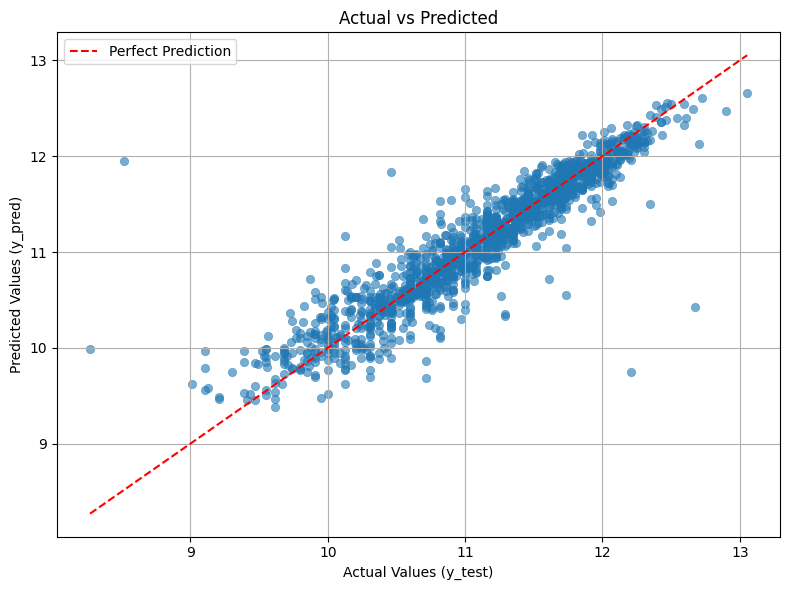

In [31]:
y_test = y_test
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test.ravel(), y=y_pred.ravel(), alpha=0.6, edgecolor=None)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Define the base model
cat_model = CatBoostRegressor(random_seed=42, verbose=False)

# Define the hyperparameter grid
param_grid = {
    'iterations': [300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=cat_model,
    param_grid=param_grid,
    scoring='r2',        # or use 'neg_root_mean_squared_error'
    cv=5,
    n_jobs=-1
)

# Fit on training data
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
model=grid_search.best_estimator_

# ===== 6. Evaluate =====
y_pred = model.predict(X_test)
# Suppose you already calculated RMSE
rmse = root_mean_squared_error(y_test, y_pred)

# Check price statistics in bikes1
mean_price = y_train.mean()
median_price = pd.DataFrame(y_train).median()
min_price = y_train.min()
max_price = y_train.max()

# Calculate relative error (as a percentage of mean price)
relative_error = (rmse / mean_price) * 100
print("R2 Score:", r2_score(y_test, y_pred))
# Print comparison
print(f"📌 RMSE: {rmse:}")
print(f"💰 Mean Price: {mean_price}")
print(f"📈 Median Price: {median_price}")
print(f"⬇️ Min Price: {min_price}")
print(f"⬆️ Max Price: {max_price}")
print(f"📊 RMSE as % of mean price: {relative_error:.2f}%")

# Optional quick judgement
if relative_error < 10:
    print("✅ Excellent RMSE (less than 10% of mean price)")
elif relative_error < 20:
    print("✅ Good RMSE (10–20% of mean price)")
elif relative_error < 30:
    print("⚠️ Acceptable RMSE (20–30% of mean price)")
else:
    print("❌ High RMSE (more than 30% of mean price) — could be improved")
print("Adjusted R-squared:", 1 - (1 - model.score(X_test, y_test)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

Best Parameters: {'depth': 6, 'iterations': 500, 'learning_rate': 0.05}
R2 Score: 0.8778998886801019
📌 RMSE: 0.2499098663538127
💰 Mean Price: 11.130995938603624
📈 Median Price: price    11.211834
dtype: float64
⬇️ Min Price: 7.601402334583733
⬆️ Max Price: 12.983705725076415
📊 RMSE as % of mean price: 2.25%
✅ Excellent RMSE (less than 10% of mean price)
Adjusted R-squared: 0.8771372925649881


In [33]:
pd.DataFrame(y_train).mean()

price    11.130996
dtype: float64

In [34]:
rmse/pd.DataFrame(y_train).mean().values

array([0.02245171])

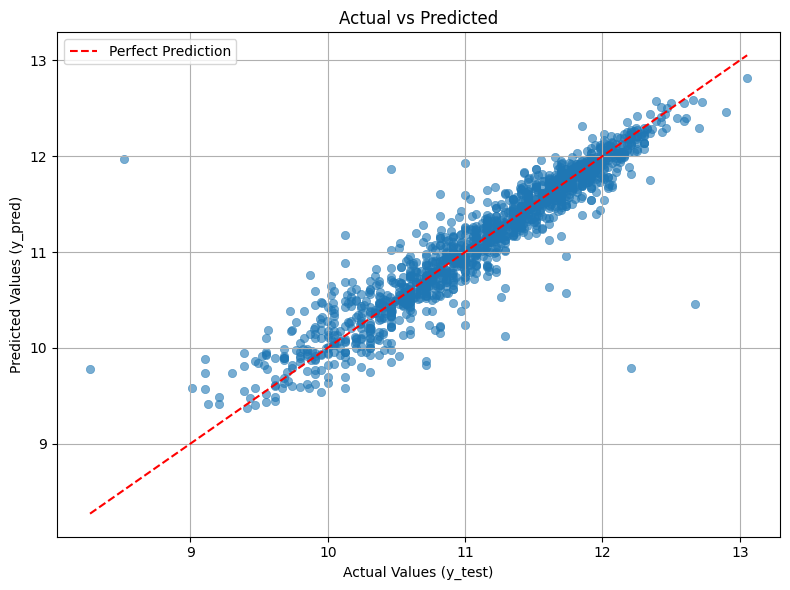

In [35]:
y_test = y_test
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test.ravel(), y=y_pred.ravel(), alpha=0.6, edgecolor=None)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Suppose you already calculated RMSE
rmse = root_mean_squared_error(y_test, y_pred)

# Check price statistics in bikes1
mean_price = y_train.mean()
median_price = pd.DataFrame(y_train).median()
min_price = y_train.min()
max_price = y_train.max()

# Calculate relative error (as a percentage of mean price)
relative_error = (rmse / mean_price) * 100
print("R2 Score:", r2_score(y_test, y_pred))
# Print comparison
print(f"📌 RMSE: {rmse:}")
print(f"💰 Mean Price: {mean_price}")
print(f"📈 Median Price: {median_price}")
print(f"⬇️ Min Price: {min_price}")
print(f"⬆️ Max Price: {max_price}")
print(f"📊 RMSE as % of mean price: {relative_error:.2f}%")

# Optional quick judgement
if relative_error < 10:
    print("✅ Excellent RMSE (less than 10% of mean price)")
elif relative_error < 20:
    print("✅ Good RMSE (10–20% of mean price)")
elif relative_error < 30:
    print("⚠️ Acceptable RMSE (20–30% of mean price)")
else:
    print("❌ High RMSE (more than 30% of mean price) — could be improved")
print("Adjusted R-squared:", 1 - (1 - model.score(X_test, y_test)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

R2 Score: 0.678395129030749
📌 RMSE: 0.40558947935841
💰 Mean Price: 11.130995938603624
📈 Median Price: price    11.211834
dtype: float64
⬇️ Min Price: 7.601402334583733
⬆️ Max Price: 12.983705725076415
📊 RMSE as % of mean price: 3.64%
✅ Excellent RMSE (less than 10% of mean price)
Adjusted R-squared: 0.6763864934729951


In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Suppose you already calculated RMSE
rmse = root_mean_squared_error(y_test, y_pred)

# Check price statistics in bikes1
mean_price = y_train.mean()
median_price = pd.DataFrame(y_train).median()
min_price = y_train.min()
max_price = y_train.max()

# Calculate relative error (as a percentage of mean price)
relative_error = (rmse / mean_price) * 100
print("R2 Score:", r2_score(y_test, y_pred))
# Print comparison
print(f"📌 RMSE: {rmse:}")
print(f"💰 Mean Price: {mean_price}")
print(f"📈 Median Price: {median_price}")
print(f"⬇️ Min Price: {min_price}")
print(f"⬆️ Max Price: {max_price}")
print(f"📊 RMSE as % of mean price: {relative_error:.2f}%")

# Optional quick judgement
if relative_error < 10:
    print("✅ Excellent RMSE (less than 10% of mean price)")
elif relative_error < 20:
    print("✅ Good RMSE (10–20% of mean price)")
elif relative_error < 30:
    print("⚠️ Acceptable RMSE (20–30% of mean price)")
else:
    print("❌ High RMSE (more than 30% of mean price) — could be improved")
print("Adjusted R-squared:", 1 - (1 - model.score(X_test, y_test)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

R2 Score: 0.8688635346191158
📌 RMSE: 0.2589924530783988
💰 Mean Price: 11.130995938603624
📈 Median Price: price    11.211834
dtype: float64
⬇️ Min Price: 7.601402334583733
⬆️ Max Price: 12.983705725076415
📊 RMSE as % of mean price: 2.33%
✅ Excellent RMSE (less than 10% of mean price)
Adjusted R-squared: 0.8680445004841901


In [38]:
import xgboost
from xgboost import XGBRegressor
model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

# ===== 6. Evaluate =====
y_pred = model.predict(X_test)
# Suppose you already calculated RMSE
rmse = root_mean_squared_error(y_test, y_pred)


mean_price = y_train.mean()
median_price = pd.DataFrame(y_train).median()
min_price = y_train.min()
max_price = y_train.max()

# Calculate relative error (as a percentage of mean price)
relative_error = (rmse / mean_price) * 100
print("R2 Score:", r2_score(y_test, y_pred))
# Print comparison
print(f"📌 RMSE: {rmse:}")
print(f"💰 Mean Price: {mean_price}")
print(f"📈 Median Price: {median_price}")
print(f"⬇️ Min Price: {min_price}")
print(f"⬆️ Max Price: {max_price}")
print(f"📊 RMSE as % of mean price: {relative_error:.2f}%")

# Optional quick judgement
if relative_error < 10:
    print("✅ Excellent RMSE (less than 10% of mean price)")
elif relative_error < 20:
    print("✅ Good RMSE (10–20% of mean price)")
elif relative_error < 30:
    print("⚠️ Acceptable RMSE (20–30% of mean price)")
else:
    print("❌ High RMSE (more than 30% of mean price) — could be improved")
print("Adjusted R-squared:", 1 - (1 - model.score(X_test, y_test)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

R2 Score: 0.8706232714890786
📌 RMSE: 0.25724885764331634
💰 Mean Price: 11.130995938603624
📈 Median Price: price    11.211834
dtype: float64
⬇️ Min Price: 7.601402334583733
⬆️ Max Price: 12.983705725076415
📊 RMSE as % of mean price: 2.31%
✅ Excellent RMSE (less than 10% of mean price)
Adjusted R-squared: 0.8698152280771436


In [39]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Define parameter distributions
param_dist = {
    'n_estimators': randint(100, 600),         # number of trees
    'max_depth': [None] + list(range(5, 50)), # depth of each tree
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,                # number of random combinations
    scoring='neg_mean_squared_error',  # or 'neg_root_mean_squared_error'
    cv=5,                     # 5-fold cross-validation
    n_jobs=-1,                # use all cores
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)
model=random_search.best_estimator_
y_pred = model.predict(X_test)
# Suppose you already calculated RMSE
rmse = root_mean_squared_error(y_test, y_pred)


mean_price = y_train.mean()
median_price = pd.DataFrame(y_train).median()
min_price = y_train.min()
max_price = y_train.max()

# Calculate relative error (as a percentage of mean price)
relative_error = (rmse / mean_price) * 100
print("R2 Score:", r2_score(y_test, y_pred))
# Print comparison
print(f"📌 RMSE: {rmse:}")
print(f"💰 Mean Price: {mean_price}")
print(f"📈 Median Price: {median_price}")
print(f"⬇️ Min Price: {min_price}")
print(f"⬆️ Max Price: {max_price}")
print(f"📊 RMSE as % of mean price: {relative_error:.2f}%")

# Optional quick judgement
if relative_error < 10:
    print("✅ Excellent RMSE (less than 10% of mean price)")
elif relative_error < 20:
    print("✅ Good RMSE (10–20% of mean price)")
elif relative_error < 30:
    print("⚠️ Acceptable RMSE (20–30% of mean price)")
else:
    print("❌ High RMSE (more than 30% of mean price) — could be improved")
print("Adjusted R-squared:", 1 - (1 - model.score(X_test, y_test)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'bootstrap': True, 'max_depth': 28, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 228}
R2 Score: 0.869992311642237
📌 RMSE: 0.2578753856328782
💰 Mean Price: 11.130995938603624
📈 Median Price: price    11.211834
dtype: float64
⬇️ Min Price: 7.601402334583733
⬆️ Max Price: 12.983705725076415
📊 RMSE as % of mean price: 2.32%
✅ Excellent RMSE (less than 10% of mean price)
Adjusted R-squared: 0.8691803274678999


In [40]:
bikes_trans

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,cc
0,25,2017,17000.0,1,331,35.0,19.0,63500,2091,220.0
1,69,2016,50000.0,1,331,35.0,19.0,115000,1744,350.0
2,6,2012,14795.0,1,331,30.0,28.0,300000,52,250.0
3,31,2017,28.0,1,6,28.0,34.0,100000,2091,400.0
4,8,2020,2000.0,1,757,30.0,30.0,197500,46,330.0
...,...,...,...,...,...,...,...,...,...,...
7852,9,2011,7000.0,1,24,42.0,16.0,55000,744,150.0
7853,2,2015,80.0,1,1401,80.0,7.7,28000,2091,100.0
7854,19,2016,6407.0,1,757,65.0,17.0,61740,2091,180.0
7855,52,2016,7524.0,1,757,57.0,11.0,49000,2091,150.0


In [41]:
numerical_cols_x

['kms_driven', 'mileage', 'power', 'cc']

### Removing Outliers based on HDBSCAN Method

In [42]:
from sklearn.cluster import KMeans
import hdbscan
cluster=hdbscan.HDBSCAN(min_cluster_size=10, prediction_data=True)

In [43]:
# Scaling Columns and Data Scaling
from sklearn.preprocessing import RobustScaler, StandardScaler
scaler_cluster = StandardScaler()
scaler_cluster.fit_transform(bikes_trans)


array([[ 0.57789981,  0.39928125,  0.1092848 , ..., -0.39572963,
         1.15277719, -0.05478997],
       [ 3.21680779,  0.14465389,  2.12426822, ...,  0.5437713 ,
         0.66491117,  1.13418372],
       [-0.56162863, -0.87385553, -0.02535273, ...,  3.91867755,
        -1.71396292,  0.21958858],
       ...,
       [ 0.21804873,  0.14465389, -0.53752488, ..., -0.42783684,
         1.15277719, -0.42062802],
       [ 2.19722971,  0.14465389, -0.46932075, ..., -0.6602493 ,
         1.15277719, -0.69500657],
       [ 0.51792463,  0.14465389, -0.01283541, ..., -0.36836552,
         1.15277719, -0.05478997]], shape=(7254, 10))

In [44]:
bikes_HDBSCAN=pd.DataFrame(scaler_cluster.fit_transform(bikes_trans), columns=bikes_trans.columns, index=bikes_trans.index)

In [45]:
cluster.fit_predict(bikes_HDBSCAN)

array([18, 14, -1, ..., 18,  5, 18], shape=(7254,))

In [46]:
bikes_HDBSCAN["Cluster"]=cluster.fit_predict(bikes_HDBSCAN)

In [47]:
bikes_HDBSCAN[bikes_HDBSCAN["Cluster"]!=-1]

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,cc,Cluster
0,0.577900,0.399281,0.109285,-0.344359,-0.345099,-0.668117,0.109168,-0.395730,1.152777,-0.054790,18
1,3.216808,0.144654,2.124268,-0.344359,-0.345099,-0.668117,0.109168,0.543771,0.664911,1.134184,14
3,0.937751,0.399281,-0.927027,-0.344359,-0.992665,-1.133895,2.155962,0.270130,1.152777,1.591481,13
4,-0.441678,1.163163,-0.806617,-0.344359,0.503709,-1.000815,1.610151,2.048797,-1.722399,0.951265,8
5,-0.621604,-0.873856,0.570960,4.041911,0.503709,-0.668117,0.927886,-0.397554,-1.096749,-0.237709,1
...,...,...,...,...,...,...,...,...,...,...,...
7851,0.337999,-0.109973,-0.926600,-0.344359,-1.002627,-0.668117,0.791433,-0.094724,1.152777,-0.386116,18
7852,-0.381703,-1.128483,-0.501316,-0.344359,-0.956799,-0.202340,-0.300191,-0.550793,-0.741043,-0.695007,8
7854,0.218049,0.144654,-0.537525,-0.344359,0.503709,1.328071,-0.163738,-0.427837,1.152777,-0.420628,18
7855,2.197230,0.144654,-0.469321,-0.344359,0.503709,0.795754,-0.982456,-0.660249,1.152777,-0.695007,5


In [48]:
cluster_outlier=bikes_HDBSCAN[bikes_HDBSCAN["Cluster"]==-1]

In [49]:
final_cluster=bikes_HDBSCAN[bikes_HDBSCAN["Cluster"]!=-1][bikes_trans.columns]

In [50]:
scaler_cluster.inverse_transform(final_cluster)

array([[2.500e+01, 2.017e+03, 1.700e+04, ..., 6.350e+04, 2.091e+03,
        2.200e+02],
       [6.900e+01, 2.016e+03, 5.000e+04, ..., 1.150e+05, 1.744e+03,
        3.500e+02],
       [3.100e+01, 2.017e+03, 2.800e+01, ..., 1.000e+05, 2.091e+03,
        4.000e+02],
       ...,
       [1.900e+01, 2.016e+03, 6.407e+03, ..., 6.174e+04, 2.091e+03,
        1.800e+02],
       [5.200e+01, 2.016e+03, 7.524e+03, ..., 4.900e+04, 2.091e+03,
        1.500e+02],
       [2.400e+01, 2.016e+03, 1.500e+04, ..., 6.500e+04, 2.091e+03,
        2.200e+02]], shape=(6480, 10))

In [51]:
final_cluster=pd.DataFrame(scaler_cluster.inverse_transform(final_cluster), columns=final_cluster.columns, index=final_cluster.index)

In [52]:
final_cluster

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,cc
0,25.0,2017.0,17000.0,1.0,331.0,35.0,19.0,63500.0,2091.0,220.000000
1,69.0,2016.0,50000.0,1.0,331.0,35.0,19.0,115000.0,1744.0,350.000000
3,31.0,2017.0,28.0,1.0,6.0,28.0,34.0,100000.0,2091.0,400.000000
4,8.0,2020.0,2000.0,1.0,757.0,30.0,30.0,197500.0,46.0,330.000000
5,5.0,2012.0,24561.0,3.0,757.0,35.0,25.0,63400.0,491.0,200.000000
...,...,...,...,...,...,...,...,...,...,...
7851,21.0,2015.0,35.0,1.0,1.0,35.0,24.0,80000.0,2091.0,183.773522
7852,9.0,2011.0,7000.0,1.0,24.0,42.0,16.0,55000.0,744.0,150.000000
7854,19.0,2016.0,6407.0,1.0,757.0,65.0,17.0,61740.0,2091.0,180.000000
7855,52.0,2016.0,7524.0,1.0,757.0,57.0,11.0,49000.0,2091.0,150.000000


#### Training Models without outliers

In [53]:

X=final_cluster.drop("price", axis=1)
y=final_cluster["price"]
# log transformation
y=np.log1p(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
"""from sklearn.preprocessing import QuantileTransformer, RobustScaler, StandardScaler

qt_normal_x = QuantileTransformer(output_distribution='normal', random_state=42)

X_train[numerical_cols_x] = qt_normal_x.fit_transform(X_train[numerical_cols_x])
X_test[numerical_cols_x] = qt_normal_x.transform(X_test[numerical_cols_x])"""


"from sklearn.preprocessing import QuantileTransformer, RobustScaler, StandardScaler\n\nqt_normal_x = QuantileTransformer(output_distribution='normal', random_state=42)\n\nX_train[numerical_cols_x] = qt_normal_x.fit_transform(X_train[numerical_cols_x])\nX_test[numerical_cols_x] = qt_normal_x.transform(X_test[numerical_cols_x])"

In [55]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Define parameter distributions
param_dist = {
    'n_estimators': randint(100, 600),         # number of trees
    'max_depth': [None] + list(range(5, 50)), # depth of each tree
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,                # number of random combinations
    scoring='neg_mean_squared_error',  # or 'neg_root_mean_squared_error'
    cv=5,                     # 5-fold cross-validation
    n_jobs=-1,                # use all cores
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)
model=random_search.best_estimator_
y_pred = model.predict(X_test)
# Suppose you already calculated RMSE
rmse = root_mean_squared_error(y_test, y_pred)

# Check price statistics in bikes1
mean_price = y_train.mean()
median_price = pd.DataFrame(y_train).median()
min_price = y_train.min()
max_price = y_train.max()

# Calculate relative error (as a percentage of mean price)
relative_error = (rmse / mean_price) * 100
print("R2 Score:", r2_score(y_test, y_pred))
# Print comparison
print(f"📌 RMSE: {rmse:,.2f}")
print(f"💰 Mean Price: {mean_price:,.2f}")
print(f"📈 Median Price: {median_price}")
print(f"⬇️ Min Price: {min_price}")
print(f"⬆️ Max Price: {max_price}")
print(f"📊 RMSE as % of mean price: {relative_error:.2f}%")

# Optional quick judgement
if relative_error < 10:
    print("✅ Excellent RMSE (less than 10% of mean price)")
elif relative_error < 20:
    print("✅ Good RMSE (10–20% of mean price)")
elif relative_error < 30:
    print("⚠️ Acceptable RMSE (20–30% of mean price)")
else:
    print("❌ High RMSE (more than 30% of mean price) — could be improved")
print("Adjusted R-squared:", 1 - (1 - model.score(X_test, y_test)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'bootstrap': True, 'max_depth': 28, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 228}
R2 Score: 0.9088231344085194
📌 RMSE: 0.21
💰 Mean Price: 11.16
📈 Median Price: price    11.225257
dtype: float64
⬇️ Min Price: 8.268988209506656
⬆️ Max Price: 12.758701222519067
📊 RMSE as % of mean price: 1.88%
✅ Excellent RMSE (less than 10% of mean price)
Adjusted R-squared: 0.9081850381485479


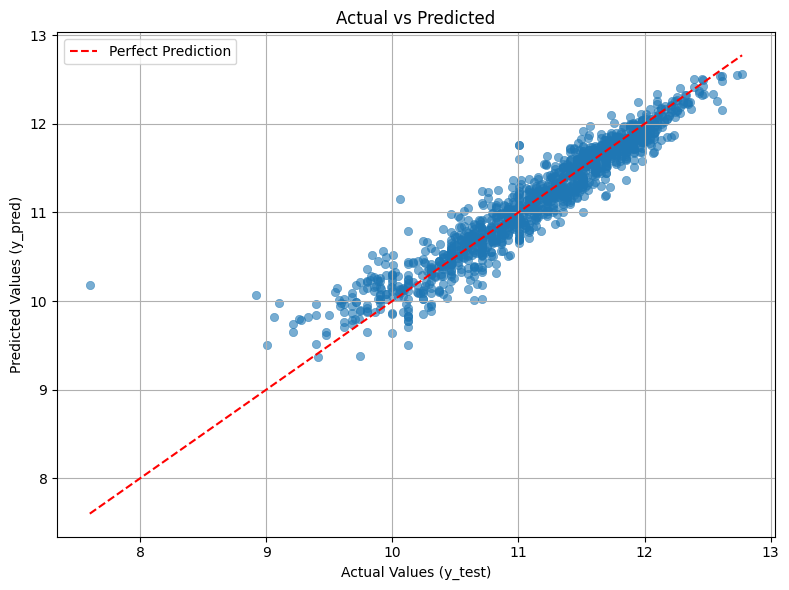

In [56]:
y_test = y_test
y_pred = model.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor=None)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [57]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Define the base model
cat_model = CatBoostRegressor(random_seed=42, verbose=False)

# Define the hyperparameter grid
param_grid = {
    'iterations': [300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=cat_model,
    param_grid=param_grid,
    scoring='r2',        # or use 'neg_root_mean_squared_error'
    cv=5,
    n_jobs=-1
)

# Fit on training data
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
model=grid_search.best_estimator_

# ===== 6. Evaluate =====
y_pred = model.predict(X_test)
# Suppose you already calculated RMSE
rmse = root_mean_squared_error(y_test, y_pred)

# Check price statistics in bikes1
mean_price = y_train.mean()
median_price = pd.DataFrame(y_train).median()
min_price = y_train.min()
max_price = y_train.max()

# Calculate relative error (as a percentage of mean price)
relative_error = (rmse / mean_price) * 100
print("R2 Score:", r2_score(y_test, y_pred))
# Print comparison
print(f"📌 RMSE: {rmse:}")
print(f"💰 Mean Price: {mean_price}")
print(f"📈 Median Price: {median_price}")
print(f"⬇️ Min Price: {min_price}")
print(f"⬆️ Max Price: {max_price}")
print(f"📊 RMSE as % of mean price: {relative_error:.2f}%")

# Optional quick judgement
if relative_error < 10:
    print("✅ Excellent RMSE (less than 10% of mean price)")
elif relative_error < 20:
    print("✅ Good RMSE (10–20% of mean price)")
elif relative_error < 30:
    print("⚠️ Acceptable RMSE (20–30% of mean price)")
else:
    print("❌ High RMSE (more than 30% of mean price) — could be improved")
print("Adjusted R-squared:", 1 - (1 - model.score(X_test, y_test)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

Best Parameters: {'depth': 6, 'iterations': 300, 'learning_rate': 0.1}
R2 Score: 0.9181400067235068
📌 RMSE: 0.1985439115677353
💰 Mean Price: 11.157275040672246
📈 Median Price: price    11.225257
dtype: float64
⬇️ Min Price: 8.268988209506656
⬆️ Max Price: 12.758701222519067
📊 RMSE as % of mean price: 1.78%
✅ Excellent RMSE (less than 10% of mean price)
Adjusted R-squared: 0.9175671140800477


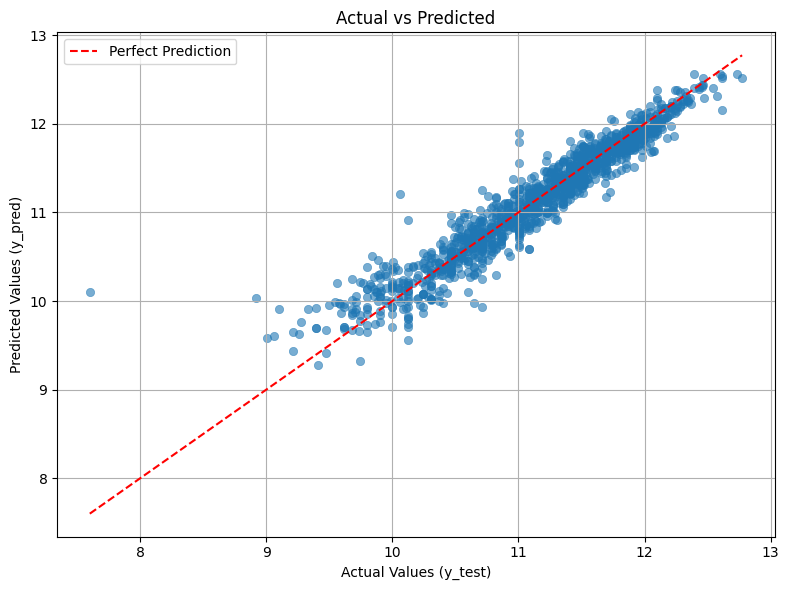

In [58]:
y_test = y_test
y_pred = model.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor=None)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Suppose you already calculated RMSE
rmse = root_mean_squared_error(y_test, y_pred)

# Check price statistics in bikes1
mean_price = y_train.mean()
median_price = pd.DataFrame(y_train).median()
min_price = y_train.min()
max_price = y_train.max()

# Calculate relative error (as a percentage of mean price)
relative_error = (rmse / mean_price) * 100
print("R2 Score:", r2_score(y_test, y_pred))
# Print comparison
print(f"📌 RMSE: {rmse:}")
print(f"💰 Mean Price: {mean_price}")
print(f"📈 Median Price: {median_price}")
print(f"⬇️ Min Price: {min_price}")
print(f"⬆️ Max Price: {max_price}")
print(f"📊 RMSE as % of mean price: {relative_error:.2f}%")

# Optional quick judgement
if relative_error < 10:
    print("✅ Excellent RMSE (less than 10% of mean price)")
elif relative_error < 20:
    print("✅ Good RMSE (10–20% of mean price)")
elif relative_error < 30:
    print("⚠️ Acceptable RMSE (20–30% of mean price)")
else:
    print("❌ High RMSE (more than 30% of mean price) — could be improved")
print("Adjusted R-squared:", 1 - (1 - model.score(X_test, y_test)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

R2 Score: 0.8299331727658253
📌 RMSE: 0.2861742321793593
💰 Mean Price: 11.157275040672246
📈 Median Price: price    11.225257
dtype: float64
⬇️ Min Price: 8.268988209506656
⬆️ Max Price: 12.758701222519067
📊 RMSE as % of mean price: 2.56%
✅ Excellent RMSE (less than 10% of mean price)
Adjusted R-squared: 0.8287429694648085


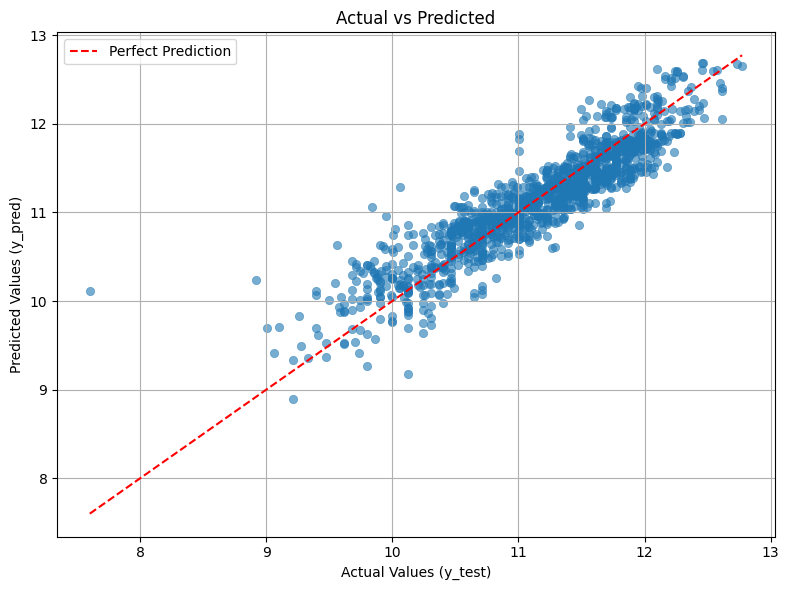

In [60]:
y_test = y_test
y_pred = model.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor=None)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [61]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Suppose you already calculated RMSE
rmse = root_mean_squared_error(y_test, y_pred)

# Check price statistics in bikes1
mean_price = y_train.mean()
median_price = pd.DataFrame(y_train).median()
min_price = y_train.min()
max_price = y_train.max()

# Calculate relative error (as a percentage of mean price)
relative_error = (rmse / mean_price) * 100
print("R2 Score:", r2_score(y_test, y_pred))
# Print comparison
print(f"📌 RMSE: {rmse:}")
print(f"💰 Mean Price: {mean_price}")
print(f"📈 Median Price: {median_price}")
print(f"⬇️ Min Price: {min_price}")
print(f"⬆️ Max Price: {max_price}")
print(f"📊 RMSE as % of mean price: {relative_error:.2f}%")

# Optional quick judgement
if relative_error < 10:
    print("✅ Excellent RMSE (less than 10% of mean price)")
elif relative_error < 20:
    print("✅ Good RMSE (10–20% of mean price)")
elif relative_error < 30:
    print("⚠️ Acceptable RMSE (20–30% of mean price)")
else:
    print("❌ High RMSE (more than 30% of mean price) — could be improved")
print("Adjusted R-squared:", 1 - (1 - model.score(X_test, y_test)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

R2 Score: 0.9021206287891727
📌 RMSE: 0.21710324100475864
💰 Mean Price: 11.157275040672246
📈 Median Price: price    11.225257
dtype: float64
⬇️ Min Price: 8.268988209506656
⬆️ Max Price: 12.758701222519067
📊 RMSE as % of mean price: 1.95%
✅ Excellent RMSE (less than 10% of mean price)
Adjusted R-squared: 0.9014356254136692


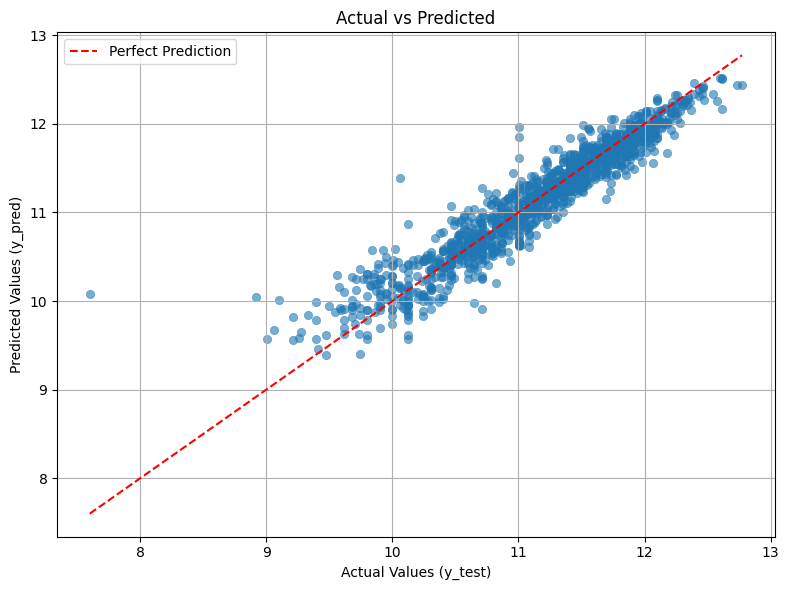

In [62]:
y_test = y_test
y_pred = model.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor=None)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [63]:
from xgboost import XGBRegressor
param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
xg_model=XGBRegressor()
model = GridSearchCV(xg_model, param_grid, cv=5, scoring='neg_mean_squared_error')

model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

model=model.best_estimator_
# ===== 6. Evaluate =====
y_pred = model.predict(X_test)
# Suppose you already calculated RMSE
rmse = root_mean_squared_error(y_test, y_pred)


mean_price = y_train.mean()
median_price = pd.DataFrame(y_train).median()
min_price = y_train.min()
max_price = y_train.max()

# Calculate relative error (as a percentage of mean price)
relative_error = (rmse / mean_price) * 100
print("R2 Score:", r2_score(y_test, y_pred))
# Print comparison
print(f"📌 RMSE: {rmse:}")
print(f"💰 Mean Price: {mean_price}")
print(f"📈 Median Price: {median_price}")
print(f"⬇️ Min Price: {min_price}")
print(f"⬆️ Max Price: {max_price}")
print(f"📊 RMSE as % of mean price: {relative_error:.2f}%")

# Optional quick judgement
if relative_error < 10:
    print("✅ Excellent RMSE (less than 10% of mean price)")
elif relative_error < 20:
    print("✅ Good RMSE (10–20% of mean price)")
elif relative_error < 30:
    print("⚠️ Acceptable RMSE (20–30% of mean price)")
else:
    print("❌ High RMSE (more than 30% of mean price) — could be improved")
print("Adjusted R-squared:", 1 - (1 - model.score(X_test, y_test)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

R2 Score: 0.9160572172565918
📌 RMSE: 0.20105385402202586
💰 Mean Price: 11.157275040672246
📈 Median Price: price    11.225257
dtype: float64
⬇️ Min Price: 8.268988209506656
⬆️ Max Price: 12.758701222519067
📊 RMSE as % of mean price: 1.80%
✅ Excellent RMSE (less than 10% of mean price)
Adjusted R-squared: 0.9154697483260392


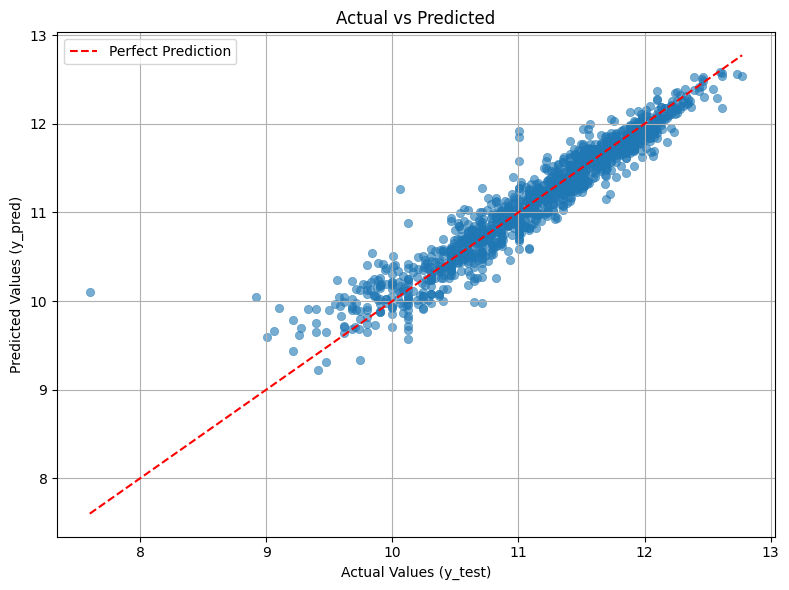

In [64]:
y_test = y_test
y_pred = model.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor=None)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [65]:
X_train.describe()

,model_name,model_year,kms_driven,owner,location,mileage,power,brand,cc
count,5184.000000,5184.000000,5184.000000,5184.00000,5184.000000,5184.00000,5184.000000,5184.000000,5184.000000
mean,15.335648,2015.757523,13743.577116,1.10841,464.442515,44.91756,18.274557,1225.641204,225.978296
std,16.447028,3.090887,14585.286069,0.35388,479.613550,14.79983,7.228434,708.536593,109.082086
min,1.000000,2001.000000,0.000000,1.00000,1.000000,5.00000,6.100000,6.000000,100.000000
25%,4.000000,2014.000000,65.000000,1.00000,49.000000,35.00000,14.000000,561.000000,150.000000
50%,10.000000,2016.000000,10000.000000,1.00000,305.000000,40.00000,19.000000,789.000000,183.773522
75%,19.000000,2018.000000,22000.000000,1.00000,802.000000,55.00000,21.000000,2091.000000,350.000000
max,78.000000,2021.000000,82898.000000,4.00000,1401.000000,95.00000,47.098039,2091.000000,535.000000


Catboost regressor without Outliers has given 0.91 R2 Score with Lowest RMSE

In [66]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Define the base model
cat_model = CatBoostRegressor(random_seed=42, verbose=False)

# Define the hyperparameter grid
param_grid = {
    'iterations': [300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=cat_model,
    param_grid=param_grid,
    scoring='r2',        # or use 'neg_root_mean_squared_error'
    cv=5,
    n_jobs=-1
)

# Fit on training data
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
model=grid_search.best_estimator_

# ===== 6. Evaluate =====
y_pred = model.predict(X_test)
# Suppose you already calculated RMSE
rmse = root_mean_squared_error(y_test, y_pred)

# Check price statistics in bikes1
mean_price = y_train.mean()
median_price = pd.DataFrame(y_train).median()
min_price = y_train.min()
max_price = y_train.max()

# Calculate relative error (as a percentage of mean price)
relative_error = (rmse / mean_price) * 100
print("R2 Score:", r2_score(y_test, y_pred))
# Print comparison
print(f"📌 RMSE: {rmse:}")
print(f"💰 Mean Price: {mean_price}")
print(f"📈 Median Price: {median_price}")
print(f"⬇️ Min Price: {min_price}")
print(f"⬆️ Max Price: {max_price}")
print(f"📊 RMSE as % of mean price: {relative_error:.2f}%")

# Optional quick judgement
if relative_error < 10:
    print("✅ Excellent RMSE (less than 10% of mean price)")
elif relative_error < 20:
    print("✅ Good RMSE (10–20% of mean price)")
elif relative_error < 30:
    print("⚠️ Acceptable RMSE (20–30% of mean price)")
else:
    print("❌ High RMSE (more than 30% of mean price) — could be improved")
print("Adjusted R-squared:", 1 - (1 - model.score(X_test, y_test)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

Best Parameters: {'depth': 6, 'iterations': 300, 'learning_rate': 0.1}
R2 Score: 0.9181400067235068
📌 RMSE: 0.1985439115677353
💰 Mean Price: 11.157275040672246
📈 Median Price: price    11.225257
dtype: float64
⬇️ Min Price: 8.268988209506656
⬆️ Max Price: 12.758701222519067
📊 RMSE as % of mean price: 1.78%
✅ Excellent RMSE (less than 10% of mean price)
Adjusted R-squared: 0.9175671140800477


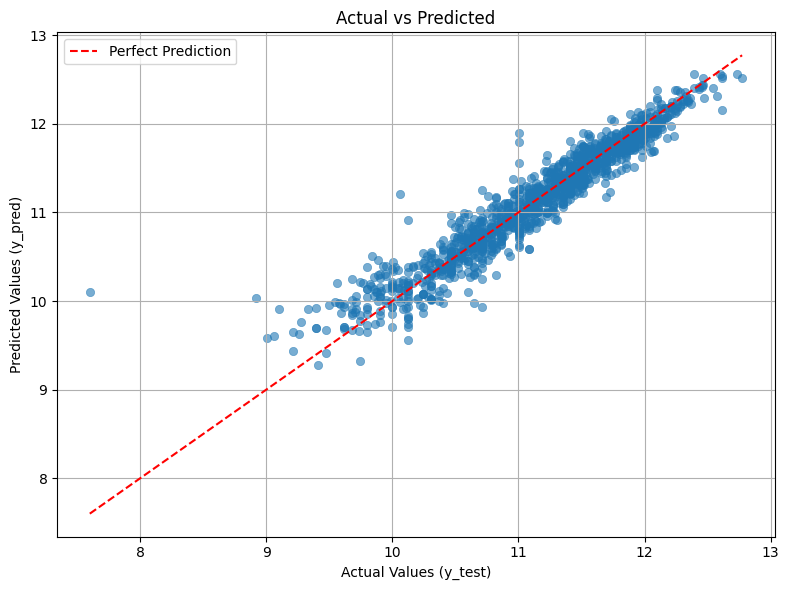

In [67]:
y_test = y_test
y_pred = model.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor=None)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In Final_ML_Model.ipynb Preprocessing steps and Final Model Prepared and its steps saved

##### Model for only Outlier Data

In [68]:
cluster_outlier.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,cc,Cluster
2,-0.561629,-0.873856,-0.025353,-0.344359,-0.345099,-1.000815,1.337245,3.918678,-1.713963,0.219589,-1
15,-0.021852,0.653909,-0.926172,4.041911,1.786884,-0.202340,0.654980,-0.587278,1.152777,-0.386116,-1
19,-0.081827,0.908536,0.780946,-0.344359,1.786884,-0.335419,0.109168,0.844776,0.664911,1.134184,-1
23,0.877776,0.144654,-0.345552,-0.344359,1.786884,0.529596,0.109168,-0.605521,1.152777,-0.054790,-1
25,2.916932,-0.109973,0.597766,-0.344359,1.786884,-0.335419,0.109168,-0.331880,0.664911,1.134184,-1


In [69]:
cluster_outlier.drop("Cluster", axis=1, inplace=True)

In [70]:
cluster_outlier=pd.DataFrame(scaler_cluster.inverse_transform(cluster_outlier), columns=cluster_outlier.columns, index=cluster_outlier.index)

In [71]:

X=cluster_outlier.drop("price", axis=1)
y=cluster_outlier["price"]
# log transformation
y=np.log1p(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
cluster_outlier.isnull().sum()

model_name    0
model_year    0
kms_driven    0
owner         0
location      0
mileage       0
power         0
price         0
brand         0
cc            0
dtype: int64

In [73]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Define the base model
cat_model = CatBoostRegressor(random_seed=42, verbose=False)

# Define the hyperparameter grid
param_grid = {
    'iterations': [300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=cat_model,
    param_grid=param_grid,
    scoring='r2',        # or use 'neg_root_mean_squared_error'
    cv=5,
    n_jobs=-1
)

# Fit on training data
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
model_outlier=grid_search.best_estimator_

# ===== 6. Evaluate =====
y_pred = model_outlier.predict(X_test)
# Suppose you already calculated RMSE
rmse = root_mean_squared_error(y_test, y_pred)

# Check price statistics in bikes1
mean_price = y_train.mean()
median_price = pd.DataFrame(y_train).median()
min_price = y_train.min()
max_price = y_train.max()

# Calculate relative error (as a percentage of mean price)
relative_error = (rmse / mean_price) * 100
print("R2 Score:", r2_score(y_test, y_pred))
# Print comparison
print(f"📌 RMSE: {rmse:}")
print(f"💰 Mean Price: {mean_price}")
print(f"📈 Median Price: {median_price}")
print(f"⬇️ Min Price: {min_price}")
print(f"⬆️ Max Price: {max_price}")
print(f"📊 RMSE as % of mean price: {relative_error:.2f}%")

# Optional quick judgement
if relative_error < 10:
    print("✅ Excellent RMSE (less than 10% of mean price)")
elif relative_error < 20:
    print("✅ Good RMSE (10–20% of mean price)")
elif relative_error < 30:
    print("⚠️ Acceptable RMSE (20–30% of mean price)")
else:
    print("❌ High RMSE (more than 30% of mean price) — could be improved")
print("Adjusted R-squared:", 1 - (1 - model.score(X_test, y_test)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

Best Parameters: {'depth': 8, 'iterations': 300, 'learning_rate': 0.05}
R2 Score: 0.8211460890030713
📌 RMSE: 0.3427593306637392
💰 Mean Price: 10.915830942737227
📈 Median Price: price    10.96303
dtype: float64
⬇️ Min Price: 8.268988209506656
⬆️ Max Price: 13.053818976767863
📊 RMSE as % of mean price: 3.14%
✅ Excellent RMSE (less than 10% of mean price)
Adjusted R-squared: 0.768589086987727


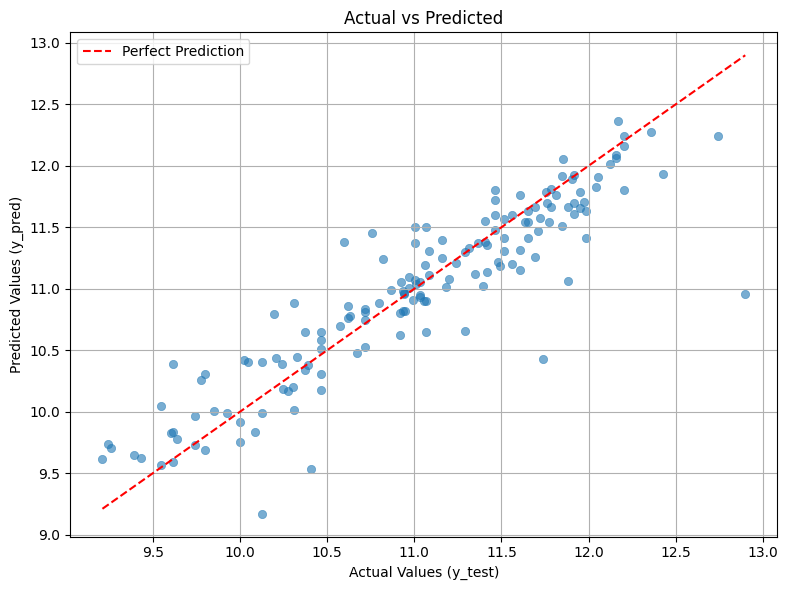

In [74]:
y_test = y_test
y_pred = model_outlier.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor=None)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Saving Necessary files in pickle

In [75]:
# Separating data between outliers and non-outliers saving StandardScaler and HDBSCAN for same purpose
import os
import pickle

# Ensure folder exists
os.makedirs("saved_models", exist_ok=True)

# Saved Standard scaler for cluster preprocessing
with open(f"saved_models/Scaler_for_cluster.pkl", "wb") as f:
    pickle.dump(scaler_cluster, f)

# saving Cluster model
with open(f"saved_models/Cluster_predictor.pkl", "wb") as f:
    pickle.dump(cluster, f)


# Catboost model for outlier
with open(f"saved_models/Catboost_model_outlier.pkl", "wb") as f:
    pickle.dump(model_outlier, f)


# Saving Catboost model for without outlier
with open(f"saved_models/Catboost_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [76]:
cluster_outlier

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,cc
2,6.0,2012.0,14795.0,1.0,331.0,30.000000,28.0,300000.0,52.0,250.000000
15,15.0,2018.0,42.0,3.0,1401.0,42.000000,23.0,53000.0,2091.0,183.773522
19,14.0,2019.0,28000.0,1.0,1401.0,40.000000,19.0,131500.0,1744.0,350.000000
23,30.0,2016.0,9551.0,1.0,1401.0,53.000000,19.0,52000.0,2091.0,220.000000
25,64.0,2015.0,25000.0,1.0,1401.0,40.000000,19.0,67000.0,1744.0,350.000000
...,...,...,...,...,...,...,...,...,...,...
7837,4.0,2009.0,25000.0,1.0,1401.0,49.979355,9.6,22000.0,2091.0,135.000000
7842,3.0,2010.0,104.0,1.0,1401.0,10.000000,8.2,14800.0,2091.0,100.000000
7845,6.0,2012.0,80.0,1.0,1401.0,80.000000,9.1,35000.0,2091.0,183.773522
7846,49.0,2014.0,15000.0,1.0,1401.0,35.000000,19.0,107000.0,1744.0,350.000000
